In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [3]:
base = 'C:/Users/liora/Documents/Engineering/3rd Year/Individual project (EG3005)/Music Genre Classification/archive/'
df = pd.read_csv(base+"features_3_sec.csv")
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [4]:
df.shape

(9990, 60)

In [5]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [6]:
df=df.drop(labels="filename",axis=1)

## Understanding the audio files

In [7]:
audio_recording=base+"genres_original/country/country.00050.wav"
data,sr=librosa.load(audio_recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [8]:
librosa.load(audio_recording,sr=45600)

(array([ 0.04582627,  0.06254332,  0.0583379 , ..., -0.13857861,
        -0.11823352, -0.05911855], dtype=float32),
 45600)

With the help of IPython.display.Audio we can play audio in the notebook. It is a library used for playing the audio in the jupyterlab. 

In [9]:
import IPython
IPython.display.Audio(data,rate=sr)

## Visualising audio files

### Plotting Raw wave files

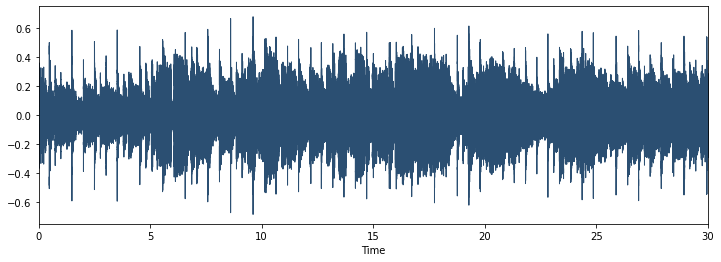

In [10]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data,color="#2B4F72")
plt.show()

Waveforms are visual representations of sound as time on the x-axis and amplitude on the y-axis. They are great for allowing us to quickly scan the audio data and visually compare and contrast which genres might be more similar than others.

### Spectrogram
A spectrogram is a visual way of representing the signal loudness of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.
Spectrograms are sometimes called sonographs, voiceprints, or voicegrams. When the data is represented in a 3D plot, they may be called waterfalls. In 2-dimensional arrays, the first axis is frequency while the second axis is time

C:\Users\liora\anaconda3\envs\tensorflow\lib\site-packages\librosa\display.py:954: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(


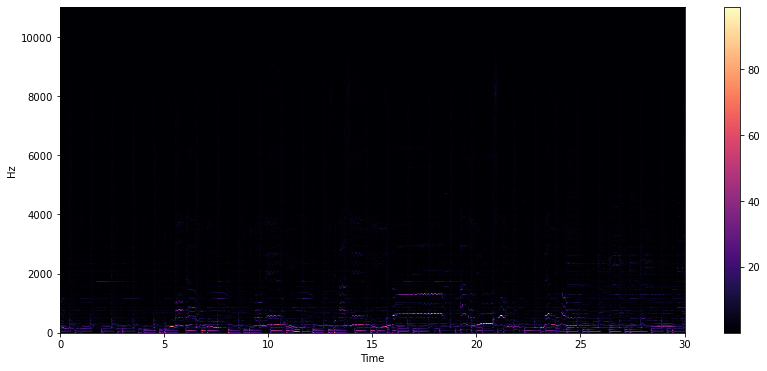

In [11]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

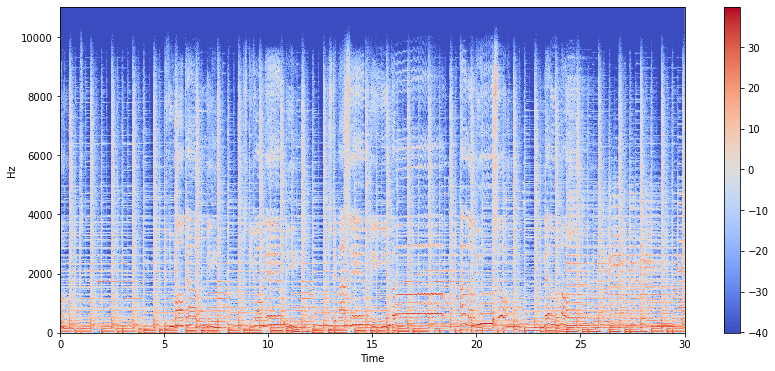

In [12]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

### Spectral Roll-Off
Spectral Rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies
librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal.

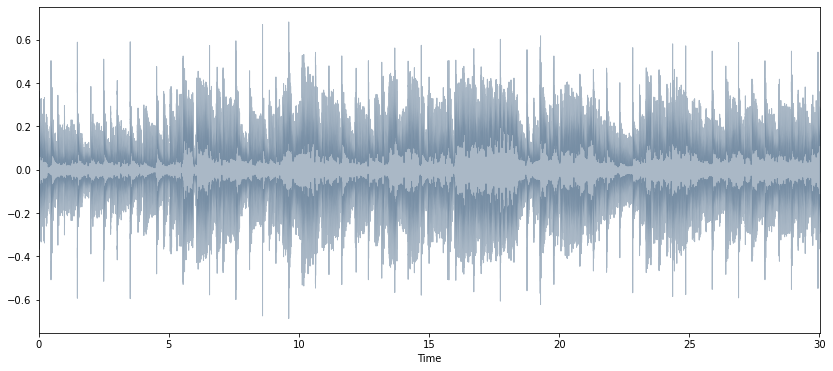

In [13]:
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]
plt.figure(figsize=(14,6))
librosa.display.waveplot(data,sr=sr,alpha=0.4,color="#2B4F72")

### Chroma Feature
It is a powerful tool for analyzing music features whose pitches can be meaningfully categorized and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music while being robust to changes in timbre and instrumentation

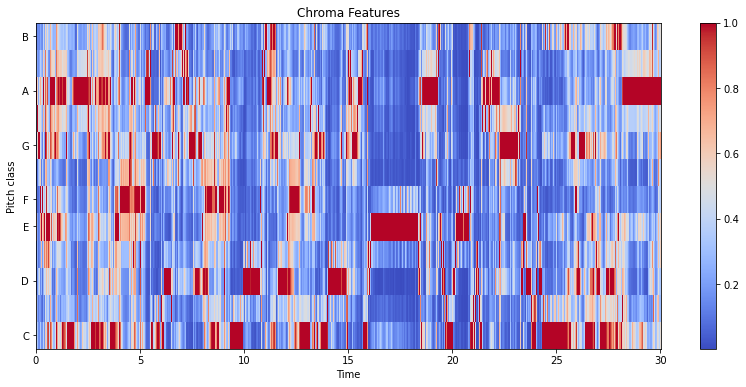

In [14]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data,sr=sr)
plt.figure(figsize=(14,6))
lplt.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma",cmap="coolwarm")
plt.colorbar()
plt.title("Chroma Features")
plt.show()

### Zero Crossing Rate
Zero crossing is said to occur if successive samples have different algebraic signs. The rate at which zero-crossings occur is a simple measure of the frequency content of a signal. Zero-crossing rate is a measure of the number of times in a given time interval/frame that the amplitude of the speech signals passes through a value of zero.

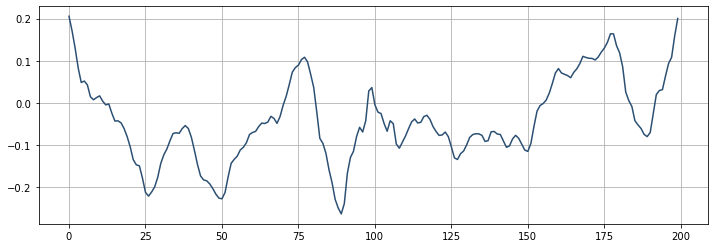

In [15]:
start=1000
end=1200
plt.figure(figsize=(12,4))
plt.plot(data[start:end],color="#2B4F72")
plt.grid()

In [16]:
zero_cross_rate=librosa.zero_crossings(data[start:end],pad=False)
print("the numbert of zero_crossings is :", sum(zero_cross_rate))

the numbert of zero_crossings is : 8


## Feature Extraction
Preprocessing of data is required before we finally train the data. We will try and focus on the last column that is ‘label’ and will encode it with the function LabelEncoder() of sklearn.preprocessing.

In [17]:
class_list=df.iloc[:,-1]
converter=LabelEncoder()

In [18]:
y=converter.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [19]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

## Scaling the features
Standard scaler is used to standardize features by removing the mean and scaling to unit variance.
The standard score of sample x is calculated as:
z = (x - u) / s

In [20]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

## Dividing Training and Testing Dataset

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [22]:
len(y_test)

3297

In [23]:
len(y_train)

6693

## Building the model


In [24]:
from tensorflow.keras.models import Sequential

In [25]:
def trainModel(model,epochs,optimizer):
    batch_size=128
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics='accuracy')
    return model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

In [26]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [27]:
import tensorflow as tf

In [28]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(512,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10,activation='softmax'),
])

print(model.summary())
model_history=trainModel(model=model,epochs=600,optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

Epoch 105/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0358 - accuracy: 0.9894 - val_loss: 0.4359 - val_accuracy: 0.9117
Epoch 106/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0289 - accuracy: 0.9915 - val_loss: 0.4060 - val_accuracy: 0.9111
Epoch 107/600
53/53 [==============================] - 1s 11ms/step - loss: 0.0291 - accuracy: 0.9904 - val_loss: 0.4368 - val_accuracy: 0.9093
Epoch 108/600
53/53 [==============================] - 1s 11ms/step - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.4258 - val_accuracy: 0.9093
Epoch 109/600
53/53 [==============================] - 1s 11ms/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.4192 - val_accuracy: 0.9111
Epoch 110/600
53/53 [==============================] - 1s 11ms/step - loss: 0.0362 - accuracy: 0.9898 - val_loss: 0.4293 - val_accuracy: 0.9130
Epoch 111/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0279 - accuracy: 0.9909 - val_loss: 0.4390 - val_accuracy:

Epoch 162/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.4336 - val_accuracy: 0.9166
Epoch 163/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.4261 - val_accuracy: 0.9227
Epoch 164/600
53/53 [==============================] - 1s 11ms/step - loss: 0.0156 - accuracy: 0.9955 - val_loss: 0.4314 - val_accuracy: 0.9190
Epoch 165/600
53/53 [==============================] - 1s 11ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.4421 - val_accuracy: 0.9187
Epoch 166/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0174 - accuracy: 0.9955 - val_loss: 0.4522 - val_accuracy: 0.9172
Epoch 167/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0227 - accuracy: 0.9925 - val_loss: 0.4700 - val_accuracy: 0.9157
Epoch 168/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0200 - accuracy: 0.9939 - val_loss: 0.4858 - val_accuracy:

53/53 [==============================] - 1s 10ms/step - loss: 0.0237 - accuracy: 0.9928 - val_loss: 0.4761 - val_accuracy: 0.9148
Epoch 277/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0151 - accuracy: 0.9948 - val_loss: 0.4708 - val_accuracy: 0.9196
Epoch 278/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.4750 - val_accuracy: 0.9230
Epoch 279/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0091 - accuracy: 0.9966 - val_loss: 0.4837 - val_accuracy: 0.9214
Epoch 280/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.4775 - val_accuracy: 0.9224
Epoch 281/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 0.4833 - val_accuracy: 0.9236
Epoch 282/600
53/53 [==============================] - 1s 11ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 0.4477 - val_accuracy: 0.9254
Epoch 

Epoch 333/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.4525 - val_accuracy: 0.9184
Epoch 334/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0164 - accuracy: 0.9946 - val_loss: 0.4512 - val_accuracy: 0.9202
Epoch 335/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.9972 - val_loss: 0.4471 - val_accuracy: 0.9224
Epoch 336/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0148 - accuracy: 0.9964 - val_loss: 0.4616 - val_accuracy: 0.9208
Epoch 337/600
53/53 [==============================] - 1s 17ms/step - loss: 0.0112 - accuracy: 0.9960 - val_loss: 0.4601 - val_accuracy: 0.9193
Epoch 338/600
53/53 [==============================] - 1s 14ms/step - loss: 0.0113 - accuracy: 0.9967 - val_loss: 0.4972 - val_accuracy: 0.9120
Epoch 339/600
53/53 [==============================] - 1s 19ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.4621 - val_accuracy: 0.9

Epoch 390/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0129 - accuracy: 0.9960 - val_loss: 0.5110 - val_accuracy: 0.9224
Epoch 391/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0243 - accuracy: 0.9934 - val_loss: 0.4730 - val_accuracy: 0.9178
Epoch 392/600
53/53 [==============================] - 1s 11ms/step - loss: 0.0158 - accuracy: 0.9957 - val_loss: 0.4792 - val_accuracy: 0.9187
Epoch 393/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0116 - accuracy: 0.9961 - val_loss: 0.4684 - val_accuracy: 0.9227
Epoch 394/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 0.9966 - val_loss: 0.4733 - val_accuracy: 0.9245
Epoch 395/600
53/53 [==============================] - 1s 11ms/step - loss: 0.0148 - accuracy: 0.9958 - val_loss: 0.4575 - val_accuracy: 0.9284
Epoch 396/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0173 - accuracy: 0.9955 - val_loss: 0.4755 - val_accuracy: 

Epoch 447/600
53/53 [==============================] - 1s 17ms/step - loss: 0.0085 - accuracy: 0.9966 - val_loss: 0.5872 - val_accuracy: 0.9242
Epoch 448/600
53/53 [==============================] - 1s 18ms/step - loss: 0.0087 - accuracy: 0.9964 - val_loss: 0.5760 - val_accuracy: 0.9202
Epoch 449/600
53/53 [==============================] - 1s 14ms/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.5444 - val_accuracy: 0.9266
Epoch 450/600
53/53 [==============================] - 1s 18ms/step - loss: 0.0112 - accuracy: 0.9960 - val_loss: 0.5348 - val_accuracy: 0.9211
Epoch 451/600
53/53 [==============================] - 1s 15ms/step - loss: 0.0283 - accuracy: 0.9925 - val_loss: 0.5224 - val_accuracy: 0.9211
Epoch 452/600
53/53 [==============================] - 1s 14ms/step - loss: 0.0167 - accuracy: 0.9963 - val_loss: 0.4810 - val_accuracy: 0.9290
Epoch 453/600
53/53 [==============================] - 1s 18ms/step - loss: 0.0125 - accuracy: 0.9964 - val_loss: 0.4933 - val_accuracy:

Epoch 504/600
53/53 [==============================] - 1s 17ms/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.4809 - val_accuracy: 0.9260
Epoch 505/600
53/53 [==============================] - 1s 18ms/step - loss: 0.0064 - accuracy: 0.9981 - val_loss: 0.5159 - val_accuracy: 0.9257
Epoch 506/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0134 - accuracy: 0.9958 - val_loss: 0.4861 - val_accuracy: 0.9233
Epoch 507/600
53/53 [==============================] - 1s 17ms/step - loss: 0.0089 - accuracy: 0.9967 - val_loss: 0.4956 - val_accuracy: 0.9287
Epoch 508/600
53/53 [==============================] - 1s 16ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 0.5037 - val_accuracy: 0.9278
Epoch 509/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0106 - accuracy: 0.9967 - val_loss: 0.5148 - val_accuracy: 0.9266
Epoch 510/600
53/53 [==============================] - 1s 17ms/step - loss: 0.0129 - accuracy: 0.9964 - val_loss: 0.5208 - val_accuracy:

Epoch 561/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0102 - accuracy: 0.9964 - val_loss: 0.5103 - val_accuracy: 0.9221
Epoch 562/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0158 - accuracy: 0.9955 - val_loss: 0.5048 - val_accuracy: 0.9242
Epoch 563/600
53/53 [==============================] - 1s 11ms/step - loss: 0.0108 - accuracy: 0.9976 - val_loss: 0.4891 - val_accuracy: 0.9208
Epoch 564/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0133 - accuracy: 0.9970 - val_loss: 0.4700 - val_accuracy: 0.9239
Epoch 565/600
53/53 [==============================] - 1s 11ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.4809 - val_accuracy: 0.9260
Epoch 566/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.5316 - val_accuracy: 0.9239
Epoch 567/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0092 - accuracy: 0.9966 - val_loss: 0.5161 - val_accuracy: 0.9

## Model Evaluation

In [29]:
test_loss,test_acc=model.evaluate(X_test,y_test,batch_size=128)
print("The test loss is ",test_loss)
print("The best accuracy is: ",test_acc*100)

26/26 [==============================] - 0s 5ms/step - loss: 0.5369 - accuracy: 0.9269
The test loss is  0.536872923374176
The best accuracy is:  92.6903247833252


For the CNN model, we had used the Adam optimizer for training the model. The epoch that was chosen for the training model is 600.
All of the hidden layers are using the RELU activation function and the output layer uses the softmax function. The loss is calculated using the sparse_categorical_crossentropy function.
Dropout is used to prevent overfitting.
We chose the Adam optimizer because it gave us the best results after evaluating other optimizers.
The model accuracy can be increased by further increasing the epochs but after a certain period, we may achieve a threshold, so the value should be determined accordingly.

The model accuracy can be increased by further increasing the epochs but after a certain period, we may achieve a threshold, so the value should be determined accordingly.
The accuracy we achieved for the test set is 92.14 percent which is very decent.
So we come to the conclusion that Neural Networks are very effective in machine learning models. Tensorflow is very useful in implementing Convolutional Neural Network (CNN) that helps in the classifying process.

### Probability Distribution of a Given Song Over Different Genres

In [30]:
import IPython.display as ipd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

# Plays the chosen song
ipd.Audio(f'{base}songs/misunderstood_lucky_daye.mp3')

In [31]:
prediction = prediction.reshape((9,)) 
  
color_data = [1,2,3,4,5,6,7,8,9]
my_cmap = cm.get_cmap('jet')
my_norm = Normalize(vmin=0, vmax=9)

fig,ax= plt.subplots(figsize=(6,4.5))
ax.bar(x=class_labels,height=prediction,
color=my_cmap(my_norm(color_data)))
plt.xticks(rotation=45)
ax.set_title("Probability Distribution Of The Given Song Over Different Genres")
  
plt.show()

NameError: name 'prediction' is not defined